In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
marketing_raw = pd.read_csv('data/marketing_data.csv')
marketing_raw.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,05-11-2014,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,04-08-2014,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [3]:
marketing_raw['Income'] = pd.to_numeric(marketing_raw['Income'].str.replace('\$|,' , '' , regex=True))
marketing_raw['Income'].fillna(marketing_raw['Income'].mean(), inplace=True)
marketing_raw['Age'] = 2014 - marketing_raw['Year_Birth']
marketing_raw.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Response                 int64
Complain                 int64
Country                 object
Age                      int64
dtype: object

In [300]:
## Age and income bins
marketing_raw['Age_bin'] = 'Unknown'
marketing_raw.loc[marketing_raw['Age'].between(0, 34, inclusive=True), 'Age_bin'] = 'Age_under35'
marketing_raw.loc[marketing_raw['Age'].between(35, 44, inclusive=True), 'Age_bin'] = 'Age_35_44'
marketing_raw.loc[marketing_raw['Age'].between(45, 59, inclusive=True), 'Age_bin'] = 'Age_45_59'
marketing_raw.loc[marketing_raw['Age'].between(60, 150, inclusive=True), 'Age_bin'] = 'Age_above59'
marketing_raw.head(10)

marketing_raw['Income_bin'] = 'Unknown'
marketing_raw.loc[marketing_raw['Income'].between(0, 34999, inclusive=True), 'Income_bin'] = 'Income_under35k'
marketing_raw.loc[marketing_raw['Income'].between(35000, 64999, inclusive=True), 'Income_bin'] = 'Income_35k_65k'
marketing_raw.loc[marketing_raw['Income'].between(65000, 999999, inclusive=True), 'Income_bin'] = 'Income_above65k'

marketing_raw['People_at_home'] = np.nan
marketing_raw.loc[marketing_raw['Marital_Status'].isin(['Married','Together']), 'People_at_home'] = marketing_raw['Kidhome'] + marketing_raw['Teenhome'] + 2 
marketing_raw.loc[~marketing_raw['Marital_Status'].isin(['Married','Together']), 'People_at_home'] = marketing_raw['Kidhome'] + marketing_raw['Teenhome'] + 1 

marketing_raw['Income_per_person'] = marketing_raw['Income']/marketing_raw['People_at_home']
marketing_raw.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Age_bin,Income_bin,People_at_home,Income_per_person
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,0,0,1,0,SP,44,Age_35_44,Income_above65k,1.0,84835.000000
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,0,1,1,0,CA,53,Age_45_59,Income_35k_65k,1.0,57091.000000
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,0,0,0,0,US,56,Age_45_59,Income_above65k,3.0,22422.333333
3,1386,1967,Graduation,Together,32474.0,1,1,05-11-2014,0,10,...,0,0,0,0,AUS,47,Age_45_59,Income_under35k,4.0,8118.500000
4,5371,1989,Graduation,Single,21474.0,1,0,04-08-2014,0,6,...,0,0,1,0,SP,25,Age_under35,Income_under35k,2.0,10737.000000
5,7348,1958,PhD,Single,71691.0,0,0,3/17/14,0,336,...,0,0,1,0,SP,56,Age_45_59,Income_above65k,1.0,71691.000000
6,4073,1954,2n Cycle,Married,63564.0,0,0,1/29/14,0,769,...,0,0,1,0,GER,60,Age_above59,Income_35k_65k,2.0,31782.000000
7,1991,1967,Graduation,Together,44931.0,0,1,1/18/14,0,78,...,0,0,0,0,SP,47,Age_45_59,Income_35k_65k,3.0,14977.000000
8,4047,1954,PhD,Married,65324.0,0,1,01-11-2014,0,384,...,0,0,0,0,US,60,Age_above59,Income_above65k,3.0,21774.666667
9,9477,1954,PhD,Married,65324.0,0,1,01-11-2014,0,384,...,0,0,0,0,IND,60,Age_above59,Income_above65k,3.0,21774.666667


In [301]:
## Creating one hot variables
edu_dummies = pd.get_dummies(marketing_raw['Education'])
marital_dummies = pd.get_dummies(marketing_raw['Marital_Status'])
country_dummies = pd.get_dummies(marketing_raw['Country'])
age_dummies = pd.get_dummies(marketing_raw['Age_bin'])
income_dummies = pd.get_dummies(marketing_raw['Income_bin'])
marketing = pd.concat([marketing_raw, edu_dummies, marital_dummies, country_dummies,age_dummies, income_dummies], axis=1)
marketing.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,SA,SP,US,Age_35_44,Age_45_59,Age_above59,Age_under35,Income_35k_65k,Income_above65k,Income_under35k
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,0,1,0,1,0,0,0,0,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,0,0,0,0,1,0,0,1,0,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,0,0,1,0,1,0,0,0,1,0
3,1386,1967,Graduation,Together,32474.0,1,1,05-11-2014,0,10,...,0,0,0,0,1,0,0,0,0,1
4,5371,1989,Graduation,Single,21474.0,1,0,04-08-2014,0,6,...,0,1,0,0,0,0,1,0,0,1


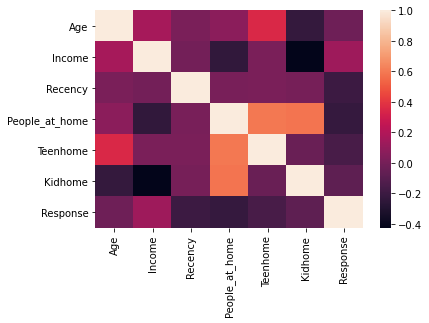

In [352]:
import seaborn as sns
corrMatrix = marketing_raw[['Age','Income','Recency','People_at_home','Teenhome','Kidhome','Response']].corr()
sns.heatmap(corrMatrix)
plt.show()

## Logistic Model

In [343]:
X_int = marketing_raw[['Income','Teenhome','Recency','NumWebVisitsMonth']] 
X_int1 = pd.concat([X_int, edu_dummies, marital_dummies], axis=1)
X = X_int1.drop(['Basic','2n Cycle','Graduation','Master','Alone','Absurd','YOLO','Widow','Single','Divorced'], axis=1)
# Dropping one big bucket from each category to avoid perfect collinearity and very small buckets because they will not contribute much
# Dropping age, countries and other insignificant categories
y = marketing_raw['Response']

In [344]:
## Train Val Test Split (80-10-10)
X_train_int, X_test, y_train_int, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_int, y_train_int, test_size=0.1111, random_state=42)

In [345]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(1792, 7) (1792,)
(224, 7) (224,)
(224, 7) (224,)


In [346]:
import statsmodels.api as sm
X_train_const = sm.add_constant(X_train)
X_val_const = sm.add_constant(X_val)
base_log = sm.Logit(y_train, X_train_const).fit()
base_log.summary()

Optimization terminated successfully.
         Current function value: 0.348410
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Response   No. Observations:                 1792
Model:                          Logit   Df Residuals:                     1784
Method:                           MLE   Df Model:                            7
Date:                Tue, 01 Jun 2021   Pseudo R-squ.:                  0.1724
Time:                        14:53:22   Log-Likelihood:                -624.35
converged:                       True   LL-Null:                       -754.37
Covariance Type:            nonrobust   LLR p-value:                 2.027e-52
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -3.5382      0.444     -7.970      0.000      -4.408      -2.668
Income             4.143e-05   4.69e-06      8.835      0.000    3.22e-05    5.06e-05
Teenhome             -1.1901      0.156     -7.634      0.000      -1.496      -0.885
Recency              -0.0234      0.003     -8.565      0.000      -0.029      -0.018
NumWebVisitsMonth     0.2672      0.039      6.785      0.000       0.190       0.344
PhD                   0.6054      0.165      3.674      0.000       0.282       0.928
Married              -0.9703      0.169     -5.737      0.000      -1.302      -0.639
Together             -0.8727      0.190     -4.602      0.000      -1.244      -0.501
=====================================================================================
"""

In [347]:
y_val_prob = base_log.predict(X_val_const) 
y_val_pred = [1 if x>0.195 else 0 for x in y_val_prob]

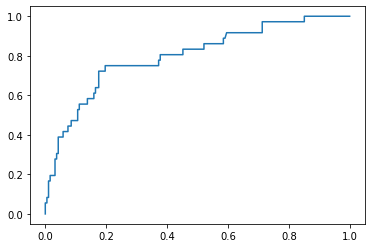

In [348]:
from sklearn.metrics import roc_curve, confusion_matrix, classification_report, precision_recall_curve, roc_auc_score
from matplotlib import pyplot as plt
fpr, tpr, thres = roc_curve(y_val, y_val_prob)
plt.plot(fpr, tpr)

In [349]:
precision, recall, thres = precision_recall_curve(y_val, y_val_prob)
d = {'precision':precision[:-1],'recall':recall[:-1], 'thres':thres}
metrics = pd.DataFrame(d)
metrics['f1'] = 2*metrics['precision']*metrics['recall']/(metrics['precision']+metrics['recall'])
metrics[100:160]
# plt.plot(recall, precision)

,precision,recall,thres,f1
100,0.284211,0.750000,0.107341,0.412214
101,0.287234,0.750000,0.107808,0.415385
102,0.290323,0.750000,0.114632,0.418605
103,0.293478,0.750000,0.114953,0.421875
104,0.296703,0.750000,0.117566,0.425197
105,0.300000,0.750000,0.118538,0.428571
106,0.303371,0.750000,0.120590,0.432000
107,0.306818,0.750000,0.123148,0.435484
108,0.310345,0.750000,0.124738,0.439024
109,0.313953,0.750000,0.124956,0.442623


In [351]:
print('Confusion Matrix:')
print(confusion_matrix(y_val, y_val_pred))
print('Classification Report:')
print(classification_report(y_val, y_val_pred))
print('AUC ROC:')
print(roc_auc_score(y_val,y_val_pred))

Confusion Matrix:
[[155  33]
 [ 10  26]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.82      0.88       188
           1       0.44      0.72      0.55        36

    accuracy                           0.81       224
   macro avg       0.69      0.77      0.71       224
weighted avg       0.86      0.81      0.83       224

AUC ROC:
0.7733451536643027
